In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [6]:
video_path = 'part3/p3a_video2.mp4'

cap = cv.VideoCapture(video_path)

fourcc = cv.VideoWriter_fourcc(*'MP4V')  # or 'XVID', 'MJPG', 'DIVX', etc.
frame_rate = cap.get(cv.CAP_PROP_FPS)
frame_size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
output_video_path = video_path.split('.')[0] + '_today.mp4'
print(frame_size)
out = cv.VideoWriter(output_video_path, fourcc, frame_rate, frame_size)


if not cap.isOpened():
  exit()


while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # rgb_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    image = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Apply a binary threshold to the grayscale frame
    ret, image = cv.threshold(image, 230, 255, cv.THRESH_BINARY_INV)


    kernel_erode2 = cv.getStructuringElement(cv.MORPH_RECT,(8, 8))
    image = cv.erode(image, kernel_erode2, iterations=1 )
    image = ~image

    frame[:410, :][image[:410, :]==0]=[255, 0, 0]
    # plt.imshow(rgb_frame)
    # plt.show()
    out.write(frame)

cap.release()
out.release()


(658, 516)


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [76]:
video_path = 'part3/p3b_video2.mp4'

output_video_path = video_path.split('.')[0] + '_result.mp4'





In [81]:
video_path = 'part3/p3b_video2.mp4'

output_video_path = video_path.split('.')[0] + '_result.mp4'

purple_lower = np.array([130, 50, 50])
purple_upper = np.array([160, 255, 255])

# brown_lower = np.array([150, 190, 210])
# brown_upper = np.array([195, 235, 255])

# Light brown in BGR
light_brown = [100, 42, 200]

# Open the video
cap = cv.VideoCapture(video_path)

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'MP4V')
frame_rate = cap.get(cv.CAP_PROP_FPS)
frame_size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
out = cv.VideoWriter(output_video_path, fourcc, frame_rate, frame_size)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to HSV
    hsv_frame = cv.cvtColor(frame, cv.COLOR_BGR2HSV) # for purple
    # hsv_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB) # for light blue

    # Create a mask for the purple/light blue color
    mask = cv.inRange(hsv_frame, purple_lower, purple_upper)

    # Change pixels with the target color to light brown
    frame[mask != 0] = light_brown

    # Write the frame to the new video
    out.write(frame)

# Release everything when job is finished
cap.release()
out.release()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [116]:
video_path = 'part4/p4a_video1.mp4'
cap = cv.VideoCapture(video_path)

fourcc = cv.VideoWriter_fourcc(*'MP4V')
frame_rate = cap.get(cv.CAP_PROP_FPS)
frame_size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
out = cv.VideoWriter(output_video_path, fourcc, frame_rate, frame_size)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    plt.imshow(frame[370:400, 350:460])
    plt.axis('off')
    plt.show()

cap.release()



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [208]:
video_path = 'part4/p4a_video1.mp4'
cap = cv.VideoCapture(video_path)
output_video_path= video_path.split('.')[0] + '_result.mp4'

fourcc = cv.VideoWriter_fourcc(*'MP4V')
frame_rate = cap.get(cv.CAP_PROP_FPS)
frame_size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
out = cv.VideoWriter(output_video_path, fourcc, frame_rate, frame_size)

kernel_erode = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

total = 576045//4
text = 'Hello, World!'
font = cv.FONT_HERSHEY_SIMPLEX  # Font type
org = (400, 410)  # Bottom-left corner of the text string in the image
fontScale = 0.7  # Font scale
color = (0, 0, 255)  # Text color (BGR)
thickness = 2
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    _, thresh = cv.threshold(frame[370:410, 330:460], 127, 255, cv.THRESH_BINARY_INV)
    erode = cv.erode(thresh, kernel_erode, iterations=1 )
    erode = cv.dilate(erode, kernel_erode, iterations=1 )

    number = round(erode.sum()/total)
    # number = erode.sum()
    text = f'chances remaining: {int(number)}'
    cv.putText(frame, text, org, font, fontScale, color, thickness, cv.LINE_AA)



    # plt.imshow(erode)
    # print(number, thresh.sum(), erode.sum())
    # # plt.axis('off')
    # plt.show()

    out.write(frame)

# Release everything when job is finished
cap.release()
out.release()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


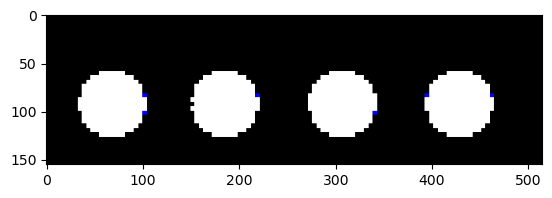

In [110]:
image = "part4/test.png"
img = cv.imread(image, cv.IMREAD_COLOR)
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
_, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
plt.imshow(thresh)

In [109]:
thresh.sum()//4, thresh.sum()

(2951115.0, 11804460)

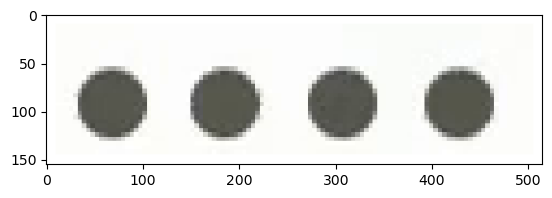

In [100]:
plt.imshow(img, 'gray')

#part4b

174.0 194.0 236.0
230.7125 233.6975 223.94


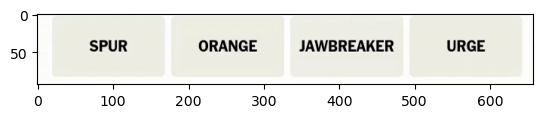

In [283]:
video_path = 'part4/p4b_video3.mp4'
cap = cv.VideoCapture(video_path)
# output_video_path= video_path.split('.')[0] + '_result.mp4'
frame_index = 0
cap.set(cv.CAP_PROP_POS_FRAMES, frame_index)
init, frame = cap.read()
frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
prev_frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
binary = cv.threshold(prev_frame_gray, 230, 255, cv.THRESH_BINARY_INV)[1]

init, frame_2 = cap.read()
frame_2 = cv.cvtColor(frame_2, cv.COLOR_BGR2RGB)
curr_frame_gray = cv.cvtColor(frame_2, cv.COLOR_BGR2GRAY)
binary2 = cv.threshold(curr_frame_gray, 230, 255, cv.THRESH_BINARY_INV)[1]



purple_red = np.mean(frame_2[50:70, 50:70][:,:,0])
purple_blue = np.mean(frame_2[50:70, 50:70][:,:,2])
purple_green = np.mean(frame_2[50:70, 50:70][:,:,1])

green_red = np.mean(frame_2[120:140, 50:70][:,:,0])
green_green = np.mean(frame_2[120:140, 50:70][:,:,1])
green_blue = np.mean(frame_2[120:140, 50:70][:,:,2])

yellow_red = np.mean(frame_2[210:230, 50:70][:,:,0])
yellow_green = np.mean(frame_2[210:230, 50:70][:,:,1])
yellow_blue = np.mean(frame_2[210:230, 50:70][:,:,2])

blue_red = np.mean(frame_2[320:340, 50:70][:,:,0])
blue_green = np.mean(frame_2[320:340, 50:70][:,:,1])
blue_blue = np.mean(frame_2[320:340, 50:70][:,:,2])


# green = frame_2[120:140, 50:70].mean()
# yellow = frame_2[210:230, 50:70].mean()
# blue = frame_2[320:340, 50:70].mean()

print(purple_red,  purple_green, purple_blue)
print(green_red,green_green,  green_blue )
# print(yellow_red, yellow_green, yellow_blue)
# print(blue_red, blue_green, blue_blue)
# plt.imshow(frame_2, 'gray')

plt.imshow(frame_2[10:99,:], 'gray')
plt.imshow(frame_2[100:191,:], 'gray')
plt.imshow(frame_2[191:278,:], 'gray')
plt.imshow(frame_2[279:372,:], 'gray')


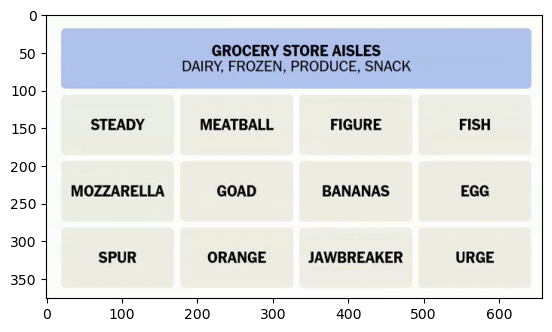

In [258]:
plt.imshow(frame_2)

In [76]:
video_path = 'part4/p4b_video2.mp4'
cap = cv.VideoCapture(video_path)
output_video_path= video_path.split('.')[0] + '_result.mp4'

fourcc = cv.VideoWriter_fourcc(*'MP4V')
frame_rate = cap.get(cv.CAP_PROP_FPS)
frame_size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
out = cv.VideoWriter(output_video_path, fourcc, frame_rate, frame_size)
color_ranges = {
    'Blue': np.array([176.0, 193.06, 236.0]),
    'Green': np.array([156.41, 193.73, 86.6]),
    'Purple': np.array([185.06, 125.6, 192.8]),
    'Yellow': np.array([246.0, 221.0, 107.0])
}

midLine = [60, 147, 237, 327]
def test(img):
    res = []
    gray = cv.cvtColor(img[:, :100], cv.COLOR_RGB2GRAY)
    edges = cv.Canny(gray, 50, 150, apertureSize=3)
    contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        # Approximate the contour to a polygon
        epsilon = 0.05 * cv.arcLength(cnt, True)
        approx = cv.approxPolyDP(cnt, epsilon, True)
        for vertex in approx:
            x, y = vertex[0]
            if x < 10:
                if y <= 99:
                    mid_score = midLine[0]
                elif 100 <= y and y <= 191:
                    mid_score = midLine[1]
                elif 191 <= y and y <= 280:
                    mid_score = midLine[2]
                else:
                    mid_score = midLine[3]

                # score = np.argmin([abs(y - i) for i in midLine])
                # mid_score = midLine[score]
                if y < mid_score:
                    res.append((y + 10, x + 10 ))
                else:
                    res.append((y - 10 , x + 10))

                return (True, (y, x), (res[0][1], res[0][0]), res, score)

tmp_l = ['Colors:']
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    ret = test(frame)
    text = " ".join(tmp_l)

    if ret:
        score = []
        color = frame[ret[2][1], ret[2][0]]
        for key, value in color_ranges.items():
            score.append(np.linalg.norm(color - value))
        if list(color_ranges.keys())[np.argmin(score)] + " ->" != tmp_l[-1]:
            tmp_l.append(list(color_ranges.keys())[np.argmin(score)] + " ->")
            text = " ".join(tmp_l)

        # print(text)


        # print(ret[1],  ret[4], tmp_l)
        # cv.circle(frame, (ret[1][1], ret[1][0]), 3, (255, 0, 0), -1)
        # plt.imshow(frame)
        # plt.show()
        # plt.axis("off")
    cv.putText(frame, text, (10, 350) , cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv.LINE_AA)
    out.write(cv.cvtColor(frame, cv.COLOR_RGB2BGR))

# Release everything when job is finished
cap.release()
out.release()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


NameError: name 'score' is not defined

In [322]:
tmp_l

['Colors:']

PART 5

In [ ]:


ret, pframe = cap.read()
pframe = cv.cvtColor(pframe, cv.COLOR_BGR2GRAY)

while cap.isOpened():
    ret, cframe = cap.read()
    if not ret:
        break
    cframe = cv.cvtColor(cframe, cv.COLOR_BGR2GRAY)
    diff = cv.absdiff(cframe, pframe)
    _, diff = cv.threshold(diff, 30, 255, cv.THRESH_BINARY)
    pframe = cframe
    plt.imshow(diff, 'gray')
    plt.show()
    if cv.waitKey(1) & 0xFF == ord('q'):
        break


In [23]:
import cv2
import numpy as np

# Open the video
# video_path = 'backgammon.m4v'  # Change to your video path
video_path = 'part5/p5b_video1.mp4'
cap = cv.VideoCapture(video_path)
output_video_path= video_path.split('.')[0] + '_result.mp4'

fourcc = cv.VideoWriter_fourcc(*'MP4V')
frame_rate = cap.get(cv.CAP_PROP_FPS)
frame_size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
out = cv.VideoWriter(output_video_path, fourcc, frame_rate, frame_size)

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")
    exit()

# Initialize the motion history image
ret, frame = cap.read()
if not ret:
    print("Failed to read the video")
    cap.release()
    exit()

frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
mhist = np.zeros_like(frame_gray, dtype=np.uint8)  # Motion history image

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    current_frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate difference
    diff = cv2.absdiff(current_frame_gray, frame_gray)
    # plt.imshow(diff, 'gray')
    # plt.show()
    change = diff > 50
    mhist[change] = 255

    # Display the motion history
    # plt.imshow(mhist, 'gray')
    # plt.show()
    # Decay the motion history


    if cv2.waitKey(int(1000 / cap.get(cv2.CAP_PROP_FPS))) & 0xFF == ord('q'):
        break

    # Update the previous frame
    frame_gray = current_frame_gray
    out.write(cv.cvtColor(mhist, cv.COLOR_GRAY2BGR))
    mhist = cv2.subtract(mhist, 5)

# Release everything when job is finished
cap.release()
out.release()


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [119]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"/usr/bin/tesseract"


video_path = ['part5/p5b_video1.mp4']
for vid in video_path:
    cap = cv.VideoCapture(vid)
    output_video_path= vid.split('.')[0] + '_result.mp4'

    fourcc = cv.VideoWriter_fourcc(*'MP4V')
    frame_rate = cap.get(cv.CAP_PROP_FPS)
    frame_size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
    out = cv.VideoWriter(output_video_path, fourcc, frame_rate, frame_size)


    window_name = 'image'
    if not cap.isOpened():
        exit()
    
    color_dict = {}
    data = {}


    while cap.isOpened():
        # Capture frame-by-frame
        ret, frame = cap.read()
        # print(frame)

        if not ret:
            break

        # rgb_frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        image_GRAY = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        # Apply a binary threshold to the grayscale frame
        ret, image = cv.threshold(image_GRAY, 230, 255, cv.THRESH_BINARY_INV)


        kernel_erode2 = cv.getStructuringElement(cv.MORPH_RECT,(8, 8))
        kernel = cv.getStructuringElement(cv.MORPH_RECT,(25, 25))
        image = cv.erode(image, kernel_erode2, iterations=1 )
        image = ~image
        # image = cv.erode(image, kernel, iterations=1 )
        # Find contours
        contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Draw rectangles around each contour
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            if w*h >= 10000 and w*h <= 80000 :
                center_x, center_y = x + w//2, y + h//2
                text_img = ~image_GRAY[y:y+h, x:x+w]
                text = pytesseract.image_to_string(text_img, lang='eng', config='--psm 6')
                # print(text)
                if text not in data:
                    data[text] = []
                    data[text].append((center_x, center_y))
                else:
                    data[text].append((center_x, center_y))

                if text not in color_dict:
                    color_dict[text] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

                # else:
                #     pass

                # plt.imshow(text_img, 'gray')
                # plt.show()
                    # try:
                    #     color_dict[text] = colors.pop(0)
                    # except:
                    #     color_dict[text] = (255, 255, 0)

                # print(text)
                # cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # print(data)
        for item in data:
            for ix in range(len(data[item])):
                curr = data[item][ix]
                cv.circle(frame, curr, 3, color_dict[item], -1)
                try:
                    next = data[item][ix+1]
                    cv.line(frame, curr, next,  color_dict[item], 2)
                except:
                    pass

                # cv.putText(frame, item, (x, y), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv.LINE_AA)


        # plt.imshow(frame, 'gray')
        # plt.show()

        # frame[:410, :][image[:410, :]==0]=[255, 0, 0]

        # plt.show()
        out.write(frame)
        cv.imshow("AI",frame)
        if cv.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
            break

    cap.release()
    out.release()
    cv.destroyAllWindows()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
